In [1]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Conv2D, MaxPool2D, Flatten, Dropout
from keras.utils import to_categorical
from keras.metrics import AUC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt 
from utils import get_image_properties

In [2]:
# Global Variables 
batch_size = 32
resize_dim = (208, 208)

# Import training dataset
features, target, example_images = get_image_properties('./dataset/train', resize_dim)

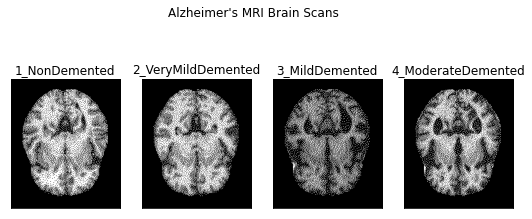

In [3]:
# Show alzheimer's mri scan examples 
fig, subplot = plt.subplots(nrows=1, ncols=4, figsize=(9,4))
subplot = subplot.flatten()

for i in range(len(example_images)):
    image, name = example_images[i]
    subplot[i].imshow(image, cmap='gray')
    subplot[i].set_xticks([])
    subplot[i].set_yticks([])
    subplot[i].set_title(name)

plt.suptitle("Alzheimer's MRI Brain Scans")
plt.show()

In [4]:
# Split dataset into features and target labels
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25)

In [5]:
# Reshape training data
features_train = features_train.reshape(features_train.shape[0], 208, 208, 1)
features_test = features_test.reshape(features_test.shape[0], 208, 208, 1)

features_train = features_train.astype('float32')
features_test = features_test.astype('float32')


In [6]:
# Transform numerical labels to binary vectory array
target_train = to_categorical(target_train, 4)
target_test = to_categorical(target_test, 4)


In [7]:
# Create Convolution Neural Network 
model = Sequential()
# ----- Layer 1 -----
model.add(Conv2D(32, (3,3), input_shape=(208, 208, 1), activation='relu', kernel_initializer='he_uniform', padding='same'))
# ----- Layer 2 -----
model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# ----- Layer 3 -----
model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# ----- Layer 4 -----
model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Tranform 2D array --> 1D array 
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dropout(0.2))

In [8]:
# Create Deep Neural Network 
# model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

In [ ]:
# Fit training data into neural network model 

# Optimizers
optimizer = 'adam'
# optimizer = SGD(learning_rate=0.01, momentum=0.90)

# Note: Using AUC over standard accuracy metric
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[AUC(name='auc')])
model.fit(features_train, target_train, epochs=3, batch_size=batch_size, validation_data=(features_test, target_test))

Epoch 1/3
120/120 [==============================] - 24s 153ms/step - loss: 1.0996 - auc: 0.8139 - val_loss: 0.7603 - val_auc: 0.9023
Epoch 2/3
103/120 [========================>.....] - ETA: 2s - loss: 0.3646 - auc: 0.9775

In [ ]:
# Check accuracy and loss of model using test data set
results = model.evaluate(features_test, target_test, use_multiprocessing=True)
print("Training test results:", results)


In [ ]:
# Test mode with different dataset
print("Testing model with test dataset...\n")
test_features, test_target, _ = get_image_properties('./dataset/test', resize_dim)
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25)

test_features = test_features.reshape(test_features.shape[0], 208, 208, 1)
test_features = test_features.astype('float32')
test_target = to_categorical(test_target, 4)

# Evaluate test dataset 
results = model.evaluate(test_features, test_target, use_multiprocessing=True)
print("Target test results:", results)
